In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle as wr

In [78]:
from importlib import reload

In [79]:
reload(wr)

<module 'wrangle' from '/Users/nadina/codeup-data-science/austin-shelter/wrangle.py'>

In [80]:
df = wr.get_shelter_data()

In [24]:
df = df[~((df.outcome_type == 'Lost') | (df.outcome_type == 'Stolen') | (df.outcome_type =='Disposal') \
   | (df.outcome_type == 'Missing'))].copy()

In [73]:
df = wr.drop_values(df)

In [22]:
cond_transfer = (df.outcome_type == 'Transfer') | (df.outcome_type == 'Relocate')
cond_adopt = (df.outcome_type == 'Adotion') | (df.outcome_type == 'Return to Owner') | \
            ((df.outcome_type == 'Rto-Adopt'))

In [23]:
df.outcome_type = np.where(cond_transfer, 'Transfer', df.outcome_type)
df.outcome_type = np.where(cond_adopt, 'Adoption', df.outcome_type)

/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_45838/3206049898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.outcome_type = np.where(cond_transfer, 'Transfer', df.outcome_type)
/var/folders/1h/vmdz8n3d00lfsp1hw8300jt00000gn/T/ipykernel_45838/3206049898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.outcome_type = np.where(cond_adopt, 'Adoption', df.outcome_type)


In [25]:
df.outcome_type.value_counts()

Adoption      68314
Transfer      26293
Euthanasia     2449
Died            813
Name: outcome_type, dtype: int64

In [28]:
train, _, _ = wr.split_data(df)

<Figure size 1440x432 with 0 Axes>

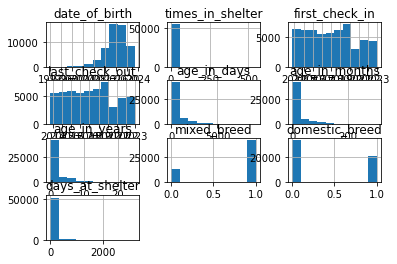

In [40]:
plt.figure(figsize=(20, 6))
train.hist()
plt.show()

In [49]:
df[df.days_at_shelter < 2500].days_at_shelter.max()

2498

In [36]:
df.shape

(97869, 22)

In [37]:
df = df[df.times_in_shelter <= 20].copy()

In [38]:
df.shape

(97799, 22)

In [39]:
97799 - 97869

-70

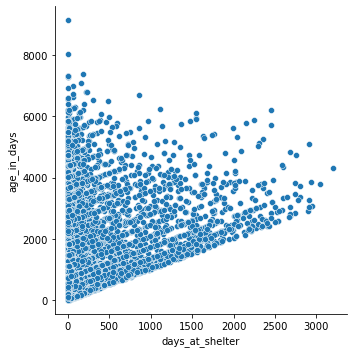

In [53]:
sns.relplot(data=train, x='days_at_shelter', y='age_in_days')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97799 entries, 1 to 188445
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         97799 non-null  object        
 1   animal_type       97799 non-null  object        
 2   sex               97798 non-null  category      
 3   breed             97799 non-null  object        
 4   color             97799 non-null  category      
 5   name              75350 non-null  object        
 6   date_of_birth     97799 non-null  datetime64[ns]
 7   intake_type       97799 non-null  category      
 8   intake_condition  97799 non-null  category      
 9   outcome_type      97799 non-null  object        
 10  outcome_subtype   42485 non-null  category      
 11  times_in_shelter  97799 non-null  int64         
 12  first_check_in    97799 non-null  datetime64[ns]
 13  last_check_out    97799 non-null  datetime64[ns]
 14  sterilized        977

In [69]:
#animal_to_keep = ['Dog', 'Cat', 'Rabbit', 'Bird', 'Guinea Pig', 'Livestock']
animals_cond = (df.animal_type == 'Dog') | \
                (df.animal_type == 'Cat') | \
                (df.animal_type == 'Rabbit') | \
                (df.animal_type == 'Bird') | \
                (df.animal_type == 'Guinea Pig') | \
                (df.animal_type == 'Livestock')

In [70]:
df.animal_type = np.where(animals_cond, df.animal_type, 'Wild')

In [71]:
df.animal_type.value_counts().head(100)

Dog           56315
Cat           39532
Wild            888
Rabbit          660
Bird            445
Guinea Pig      320
Livestock        18
Name: animal_type, dtype: int64

In [ ]:
bunnie_cond = df.breed.str.contains('Rabbit') | \
            df.breed.str.contains('Dutch') | \
            df.breed.str.contains('Lop') | \
            df.breed.str.contains('Rex') | \
            df.breed.str.contains('Hare') | \
            df.breed.str.contains('Flemish') |
            df.breed.str.contains('Hotot')

In [59]:
df.animal_type.unique()

array(['Cat', 'Dog', 'Rabbit', 'Fo', 'Bird', 'Guinea Pig', 'Bat',
       'Cinnamon', 'Dutch/Angora-Satin', 'Ferret', 'Jersey Wooly',
       'Lizard', 'Silver', 'Rat', 'Re', 'Hedgehog', 'Raccoon',
       'Sugar Glider', 'Hamster', 'Rex-Min', 'Mouse', 'Hotot', 'Skunk',
       'Squirrel', 'Lop-Amer Fuzzy', 'Fox', 'Coyote', 'Tortoise',
       'Cold Water', 'Snake', 'Opossum', 'Turtle', 'Lop-Min', 'Livestock',
       'Lop-Holland', 'Gerbil', 'ouse', 'Checkered Giant',
       'American Sable', 'Tarantula', 'Polish', 'Chinchilla',
       'Dwarf Hotot', 'Rex-Mini', 'Beveren', 'Himalayan', 'Angora-Satin',
       'Cottontail', 'Belgian Hare', 'Rhinelander',
       'Lop-Mini/Lop-Holland', 'Chinchilla-Stnd', 'Flemish Giant',
       'Harlequin', 'Britannia Petit', 'Prairie Dog', 'Angora-English',
       'Armadillo', 'Rex/Lop-English', 'Hermit Crab', 'Chinchilla-Amer',
       'Dutch/Rabbit Sh', 'Rabbit Sh/Lop-Mini', 'Tropical'], dtype=object)

In [88]:
pd.crosstab(df.intake_condition, df.outcome_type)

outcome_type,Adoption,Died,Euthanasia,Transfer
intake_condition,,,,
Aged,141,4,24,72
Agonal,0,1,0,0
Behavior,26,0,7,11
Feral,40,2,2,59
Injured,2618,123,587,1464
Med Attn,2,0,0,1
Medical,112,4,4,42
Neonatal,133,9,5,82
Normal,62536,506,1391,22924


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97799 entries, 1 to 188445
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         97799 non-null  object        
 1   animal_type       97799 non-null  object        
 2   sex               97798 non-null  category      
 3   breed             97799 non-null  object        
 4   color             97799 non-null  category      
 5   name              75350 non-null  object        
 6   date_of_birth     97799 non-null  datetime64[ns]
 7   intake_type       97799 non-null  category      
 8   intake_condition  97799 non-null  category      
 9   outcome_type      97799 non-null  object        
 10  outcome_subtype   42485 non-null  category      
 11  times_in_shelter  97799 non-null  int64         
 12  first_check_in    97799 non-null  datetime64[ns]
 13  last_check_out    97799 non-null  datetime64[ns]
 14  sterilized        977

In [311]:
cat_vars = ['animal_type', 'sex', 'breed', 'color', 'intake_type', 'intake_condition', \
               'sterilized', 'sex_of_animal', 'mixed_breed', 'domestic_breed']
alpha = 0.05

In [312]:
def get_p_values(df, cat_vars, target):
    '''
    accepts a data frame and the list of categorical column names
    returns a data frame with p_values of all categorical variables
    '''

    #dictionary to hold names of the column and a p_value assotiated with it
    p_v = {}
    #for every column in category variables run a chi2 test
    for col in cat_vars:
        #create a crosstable
        observed = pd.crosstab(df[col], df[target])
        #run a chi squared test fot categorical data
        test = stats.chi2_contingency(observed)
        p_value = test[1]
        #add the result to the dictionary
        p_v[col] = p_value
        
        #transform a dictionary to Series and then to Data Frame
        p_values = pd.Series(p_v).reset_index()
        p_values.rename(columns = {'index':'Feature', 0:'P_value'}, inplace = True)
        p_values = p_values.sort_values(by='P_value')

        #add the column that shows if the result is significant
        p_values['is_significant'] = p_values['P_value'] < alpha
    
    return p_values

In [313]:
get_p_values(df, cat_vars, 'outcome_type').sort_values(by='P_value')

,Feature,P_value,is_significant
0,animal_type,0.000000e+00,True
1,sex,0.000000e+00,True
4,intake_type,0.000000e+00,True
5,intake_condition,0.000000e+00,True
6,sterilized,0.000000e+00,True
7,sex_of_animal,0.000000e+00,True
3,color,3.422400e-277,True
2,breed,1.352134e-273,True
9,domestic_breed,3.780397e-118,True
8,mixed_breed,6.764281e-96,True


In [99]:
train, _, _ = wr.split_data(df)

In [110]:
adopted = train[train.outcome_type == 'Adoption']
transfered = train[train.outcome_type == 'Transfer']
euthanized = train[train.outcome_type == 'Euthanasia']
died = train[train.outcome_type == 'Died']
list_of_outcomes = [adopted, transfered, euthanized, died]
dict_of_outcomes = {
    'adopted':adopted,
    'transfered':transfered,
    'euthanized':euthanized,
    'died':died   
}

In [103]:
num_cols = ['times_in_shelter', 'age_in_days', 'age_in_months', 'age_in_years', 'days_at_shelter']

In [111]:
for col in num_cols:
    print(f'Test variable {col}')
    for key in dict_of_outcomes:
        print(key)
        display(stats.ttest_1samp(dict_of_outcomes[key][col], train[col].mean()))
    print('=============')
    print()

times_in_shelter
adopted


Ttest_1sampResult(statistic=8.85768242417611, pvalue=8.513370931933245e-19)

transfered


Ttest_1sampResult(statistic=-20.141012776537384, pvalue=5.089449633948423e-89)

euthanized


Ttest_1sampResult(statistic=-3.672264553472226, pvalue=0.00024966082132536554)

died


Ttest_1sampResult(statistic=-11.673461466848055, pvalue=1.027065340369573e-27)


age_in_days
adopted


Ttest_1sampResult(statistic=-4.698475785113413, pvalue=2.6302146912832583e-06)

transfered


Ttest_1sampResult(statistic=2.7754082936214566, pvalue=0.00552020215321972)

euthanized


Ttest_1sampResult(statistic=12.574451943568981, pvalue=2.136645225954722e-34)

died


Ttest_1sampResult(statistic=-2.3392246458111807, pvalue=0.019756570385428673)


age_in_months
adopted


Ttest_1sampResult(statistic=-4.711537645552178, pvalue=2.467185392208525e-06)

transfered


Ttest_1sampResult(statistic=2.7858788850560967, pvalue=0.005345110202560751)

euthanized


Ttest_1sampResult(statistic=12.591021967091843, pvalue=1.770346528853764e-34)

died


Ttest_1sampResult(statistic=-2.3228428615903534, pvalue=0.02062871388127511)


age_in_years
adopted


Ttest_1sampResult(statistic=-6.3596910240953735, pvalue=2.0444018505096453e-10)

transfered


Ttest_1sampResult(statistic=4.9209784288903835, pvalue=8.704406661424163e-07)

euthanized


Ttest_1sampResult(statistic=13.461951256329389, pvalue=6.900635790984256e-39)

died


Ttest_1sampResult(statistic=-1.7120377039050938, pvalue=0.08757260952264365)


days_at_shelter
adopted


Ttest_1sampResult(statistic=10.522074764389563, pvalue=7.415287388821403e-26)

transfered


Ttest_1sampResult(statistic=-21.80063887913393, pvalue=9.942956102006198e-104)

euthanized


Ttest_1sampResult(statistic=-2.4043597945736064, pvalue=0.016332870639895015)

died


Ttest_1sampResult(statistic=-6.34771555975993, pvalue=5.30293164286305e-10)

In [106]:
stats.ttest_1samp(adopted.times_in_shelter, train.times_in_shelter.mean())

Ttest_1sampResult(statistic=8.85768242417611, pvalue=8.513370931933245e-19)

### 1. What percentage of animals is adopted, transfered, euthanized or died of natural conditions?

In [ ]:
# Hello Ryan!
piechart_labels = ['Adopted', 'Transfered', 'Euthanized', 'Died']
sns.pie(data=train, )

In [163]:
values.tolist()

[0.7, 0.27, 0.03, 0.01]

In [175]:
values = train.outcome_type.value_counts().tolist()
piechart_labels = ['Adopted', 'Transfered', 'Euthanized', 'Died']
flare = sns.color_palette('flare')
flare = sns.color_palette('Accent')
set2 = sns.color_palette('Set2')

In [153]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

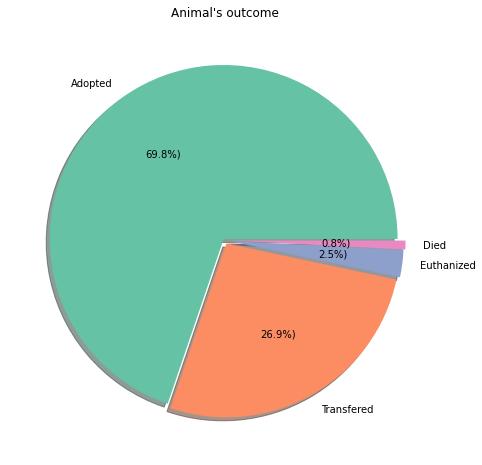

In [177]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%)'.format(pct, v=val)
        return my_format
plt.figure(figsize=(8, 8))
plt.pie(values, labels=piechart_labels, explode=[0.01, 0.02, 0.03, 0.04], 
        colors=set2, autopct=autopct_format(values),
        shadow=True)
plt.title('Animal\'s outcome')
plt.show()

In [183]:
cats = train[train.animal_type == 'Cat']
dogs = train[train.animal_type == 'Dog']
rabbits = train[train.animal_type == 'Rabbit']
others = train[(train.animal_type == 'Wild') | (train.animal_type == 'Bird') \
                                            | (train.animal_type == 'Guinea Pig') \
                                            | (train.animal_type == 'Livestock')]
animal_type_dict = {
    'Cats':cats,
    'Dogs':dogs,
    'Rabbits':rabbits,
    'Others':others
}

In [189]:
train.outcome_type.value_counts().index.tolist()

['Adoption', 'Transfer', 'Euthanasia', 'Died']

In [201]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

### 2. Is animal type connected to the outcome?

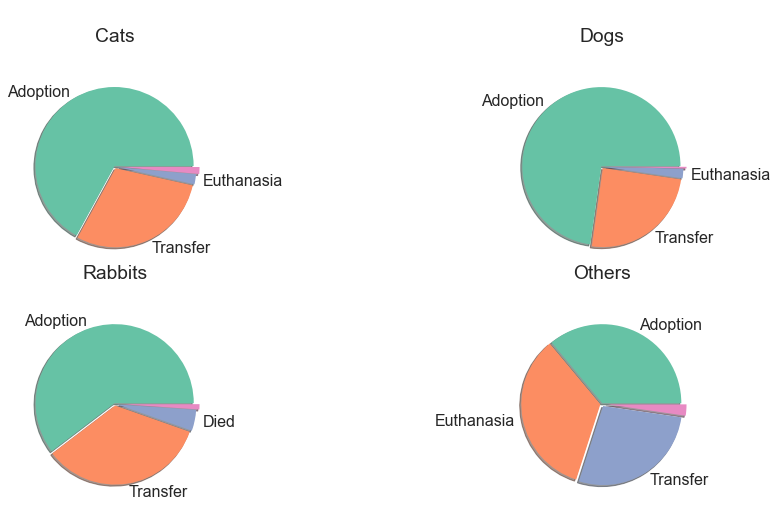

In [230]:
plt.figure(figsize=(16, 8))
for i, key in enumerate(animal_type_dict):
    plt.subplot(2, 2, i+1)
    plt.title('\n' + key + '\n')
    v = animal_type_dict[key].outcome_type.value_counts().tolist()
    labels = animal_type_dict[key].outcome_type.value_counts().index.tolist()
    labels[3] = ''
    patches, text = plt.pie(v, labels=labels, explode=[0.01, 0.02, 0.03, 0.07], 
        colors=set2, shadow=True)
    
    text[2]

In [215]:
text

[Text(0.4707239393852963, 1.0052457276156852, 'Adoption'),
 Text(-1.0994568184644697, -0.2135291650617925, 'Euthanasia'),
 Text(0.5977292708473253, -0.9589680488797973, 'Transfer'),
 Text(1.1370145735711885, -0.08244913272271964, 'Died')]

In [178]:
train.animal_type.value_counts()

Dog           31448
Cat           22080
Wild            426
Rabbit          371
Bird            247
Guinea Pig      183
Livestock        12
Name: animal_type, dtype: int64

In [203]:
plt.pie?

### 3. Does the sex of the animal have a relationship to the outcome?

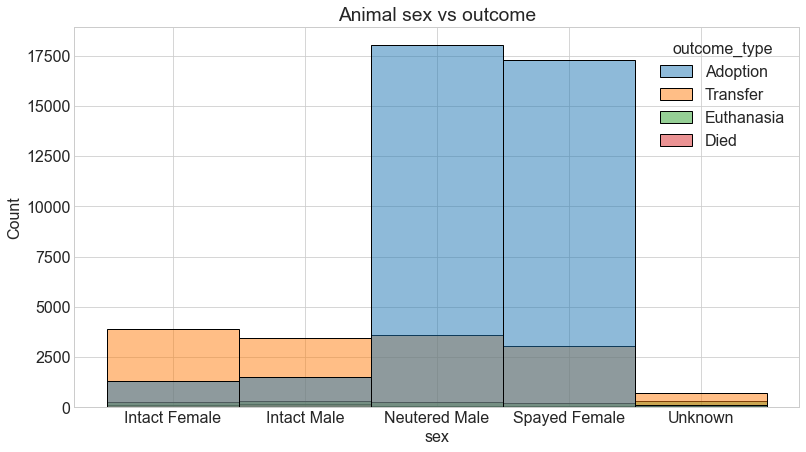

In [247]:
sns.histplot(data=train, x='sex', hue='outcome_type')
plt.title('Animal sex vs outcome');

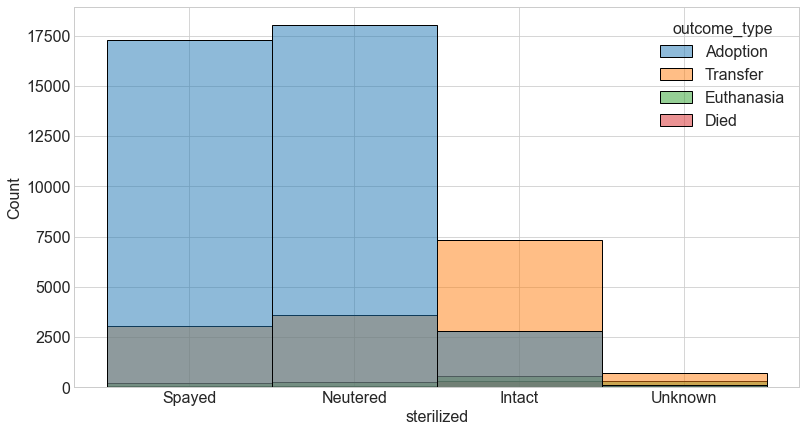

In [248]:
sns.histplot(data=train, x='sterilized', hue='outcome_type');

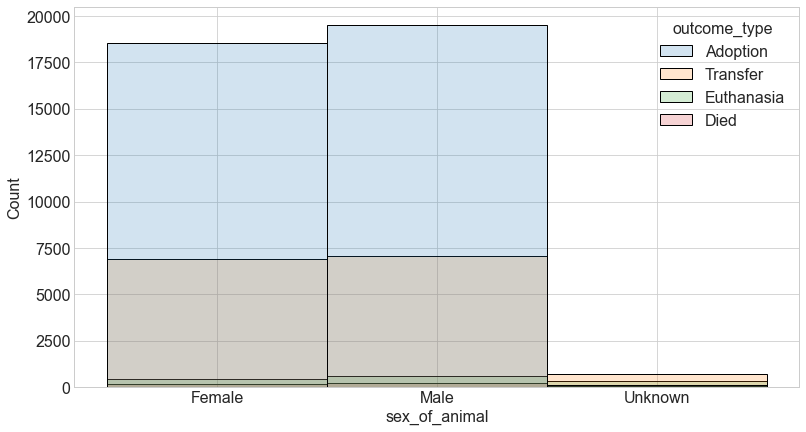

In [251]:
sns.histplot(data=train, x='sex_of_animal', hue='outcome_type', alpha=0.2);

### 4. Is the age of the animal connected to the outcome type?

In [ ]:
graph = sns.barplot(x='county_name', y='home_value', estimator=np.median, data=df, palette='flare')
graph.axhline(df.home_value.median(), color = (0.4, 0.4, 0.4), label = 'median')

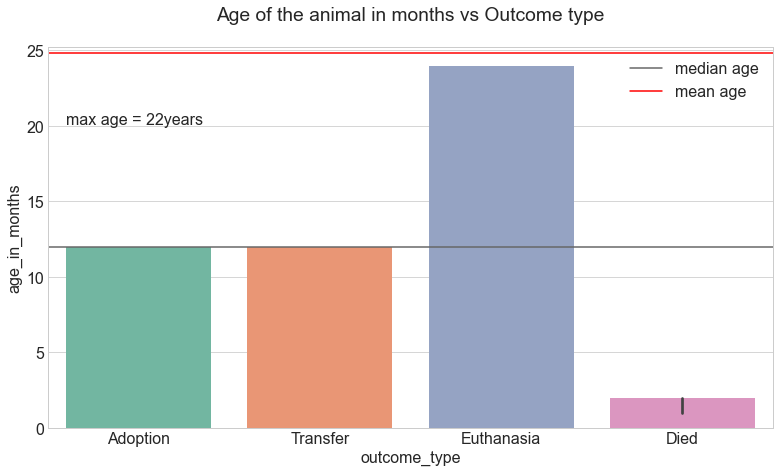

In [291]:
graph = sns.barplot(y='age_in_months',  x='outcome_type', estimator=np.median, data=train, palette='flare')
graph.axhline(train.age_in_months.median(), color = (0.4, 0.4, 0.4), label = 'median age')
graph.axhline(train.age_in_months.mean(), color = 'red', label = 'mean age')
plt.title('Age of the animal in months vs Outcome type\n')
plt.text(-0.4, 20.1, 'max age = ' + str(train.age_in_years.max()) + 'years')
plt.legend()
plt.show()

### 5. How differ the age of the animal from its type? And how does it affect the outcome type?

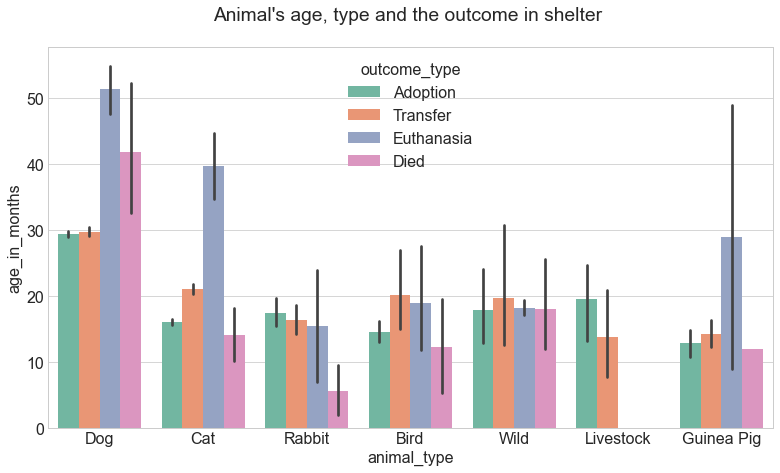

In [297]:
sns.barplot(x='animal_type', y='age_in_months', hue='outcome_type', data=train, palette=set2)
plt.title('Animal\'s age, type and the outcome in shelter \n')
plt.show()

Old guinea pigs and old cats have must higher chances to be euthanized 

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

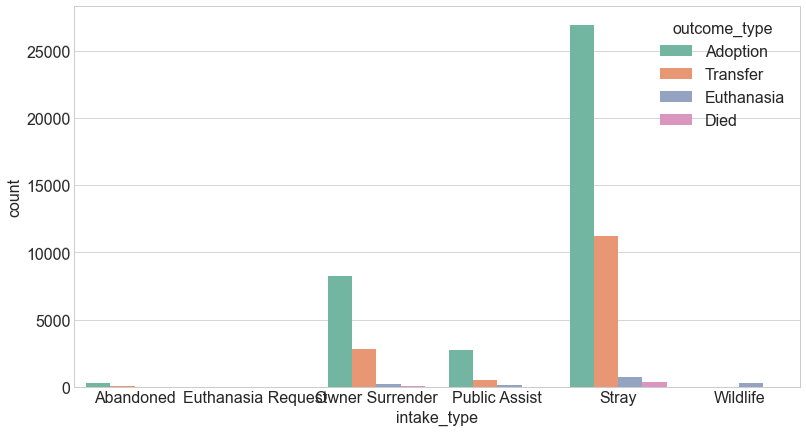

In [303]:
sns.countplot(x='intake_type', hue='outcome_type', data=train, palette=set2)
plt.yticks(rotation = 0.45)

<AxesSubplot:xlabel='domestic_breed', ylabel='count'>

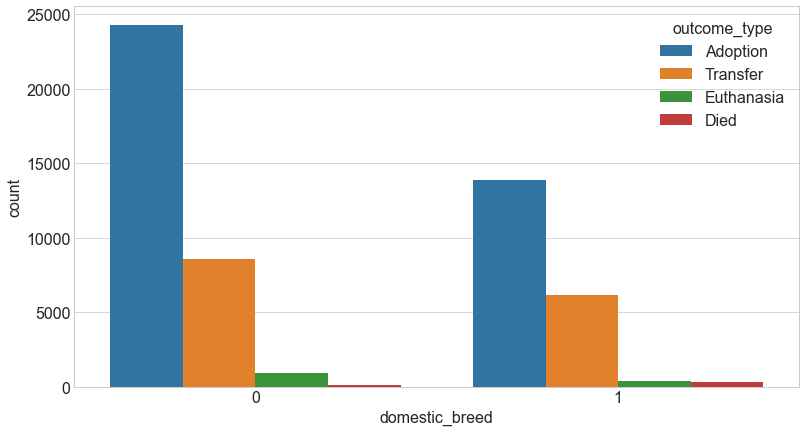

In [308]:
sns.countplot(data=train, x='domestic_breed', hue='outcome_type')

<AxesSubplot:xlabel='mixed_breed', ylabel='count'>

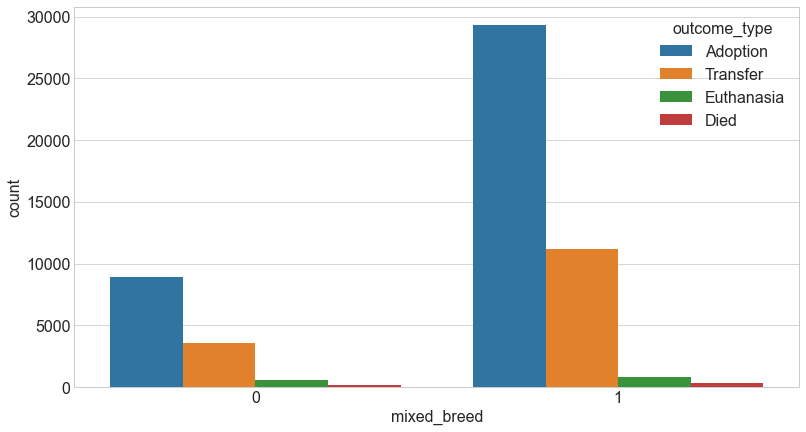

In [309]:
sns.countplot(data=train, x='mixed_breed', hue='outcome_type')

## Requirements:
- 3+ stat tests
- exploration summarized (takeaways)
- 6+ visualizations 
- 4+ questions

In [273]:
plt.text?

## Top 10 breeds

In [327]:
top10_breeds = pd.DataFrame()

In [328]:
top10_breeds['overall'] = train.breed.value_counts().head(10).index

In [330]:
top10_breeds['adopted'] = adopted.breed.value_counts().head(10).index

In [331]:
top10_breeds['transfered'] = transfered.breed.value_counts().head(10).index
top10_breeds['euthanized'] = euthanized.breed.value_counts().head(10).index
top10_breeds['died'] = died.breed.value_counts().head(10).index

In [332]:
top10_breeds

,overall,adopted,transfered,euthanized,died
0,Domestic Shorthair Mix,Domestic Shorthair Mix,Domestic Shorthair Mix,Unknown,Domestic Shorthair Mix
1,Domestic Shorthair,Domestic Shorthair,Domestic Shorthair,Domestic Shorthair Mix,Domestic Shorthair
2,Pit Bull Mix,Pit Bull Mix,Pit Bull Mix,Pit Bull Mix,Unknown
3,Labrador Retriever Mix,Labrador Retriever Mix,Chihuahua Shorthair Mix,Domestic Shorthair,Domestic Medium Hair Mix
4,Chihuahua Shorthair Mix,Chihuahua Shorthair Mix,Labrador Retriever Mix,Labrador Retriever Mix,Chihuahua Shorthair Mix
5,German Shepherd Mix,German Shepherd Mix,Domestic Medium Hair Mix,Chihuahua Shorthair Mix,Domestic Longhair Mix
6,Domestic Medium Hair Mix,Domestic Medium Hair Mix,Unknown,Pit Bull,Labrador Retriever Mix
7,Unknown,Pit Bull,German Shepherd Mix,Domestic Longhair Mix,Domestic Medium Hair
8,Pit Bull,Australian Cattle Dog Mix,Pit Bull,Domestic Medium Hair Mix,Pit Bull Mix
9,Australian Cattle Dog Mix,Unknown,Domestic Longhair Mix,Domestic Medium Hair,Australian Cattle Dog Mix


In [ ]:
# wrangle df
'''
str.contains('Domestic') --> 'Domestic'
strip ' Mix'
then re-run all code
'''